<a href="https://colab.research.google.com/github/UthamanA/EDA-IPL-data-Analysis/blob/main/IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008.##
##**Explore** and analyze the data to discover results and statistics for different teams playing in IPL.##

**Finding valueable result for below rising questions. which will helps as to analyse the IPL Twenty20 cricket league**

**General Analysis of IPL Matches**
1.   How many matches we've got in data sheet?
2.   How many seasons we've got in the dataset?
3.   Which team had won by maximum runs?
4.Which team had won by maximum wickets?
5.Which team had won by (closest margin) minimum runs?
6.Which team had won by minimum wickets?
7.Which season had most number of matches?
8.The most successful IPL Team
9.Top player of the match Winners
10.How many Toss winning teams have won the matches?
11.What's the percentage of it?
12.Team Performance
13.Most IPL Matches played in a Venue

**IPL Batting Analysis**

14. Most Run Scored by IPL Teams
15. Most IPL Runs by a Batsman
16. Avg Run by Teams in Powerplay
17. Most IPL Century by a Player
18. Most IPL Fifty by Player
19. Most Sixes in an IPL Inning
20. Most Boundary (4s) hit by a Batsman
21. Highest Total by IPL Teams
22. Most IPL Sixes Hit by a batsman

**Bowling Analysis**

23. Most run conceded by a bowler in an inning
24. Most IPL Wickets by a Bowler
25. Most Dot Ball by a Bowler
26. Most Maiden over by a Bowler
27. Most Wickets by an IPL Team
28. Most No Ball Runs by an IPL team
29. Most No Ball Runs by an IPL Bowler
30. Most run given by a team in Extra runs
31. Most Wide Runs by an IPL team

**Importing Libraries**

We will use NumPy and Pandas libraries of Python for data analysis and for data visualization Seaborn and Matplotlib libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing IPL Dataset**

We have imported the CSV dataset below with the help of pandas read_csv 

functions We can see the content of the dataset by using head(), tail() function.

In [3]:
path = '/content/drive/MyDrive/Capstone Project/capstone pro 1 - EDA/Data set/'
deliveries= pd.read_csv(path + 'deliveries.csv')

In [4]:
matches = pd.read_csv(path + 'matches.csv')

In [5]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


**Checking IPL Dtataset Atributes**

Before we proceed with our Python data analysis of IPL data, we should know what columns are present in the dataset, their count, and data type. For this, we use Pandas info() function. looking for and handling the NaN/null/Missing values.

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


The .csv file has data of IPL matches starting from the season 2008 to 2019.

The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.

The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.

75% of the victorious teams that bat first won by a margin of 19 runs.

75% of the victorious teams that bat second won by a margin of 6 wickets.

There were 756 IPL matches hosted from 2008 to 2019.

Let’s view the unique values of each column to help us understand the dataset better.

In [9]:
for col in matches:
    print(matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

In [10]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

The dataset has 18 columns.

Let’s get acquainted with the columns.

**id**: The IPL match id.

**Season**: The IPL Season

**city**: The city where the IPL match was held.

**date**: The date on which the match was held.

**team1**: One of the teams of the IPL match.

**team2**: The other team of the IPL match.

**toss_winner**: The team that won the toss.

**toss_decision**: The decision taken by the team that won the toss to ‘bat’ or ‘field’.

**result**: The result(‘normal’, ‘tie’, ‘no result’) of the match.

**dl_applied**: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

**winner**: The winner of the match.

**win_by_runs**: Provides the runs by which the team batting first won.

**win_by_wickets**: Provides the number of wickets by which the team batting second won.

**player_of_match**: The outstanding player of the match.

**venue**: The venue where the match was hosted.

**umpire1:** One of the two on-field umpires who officiate the match.

**umpire2:** One of the two on-field umpires who officiate the match.

**umpire3:** The off-field umpire who officiates the match,

A mere glance of the DataFrame through its columns indicates the presence of NaN values in the ‘umpire3’ column. Let’s see the count of NaN values in the column.


In [11]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object and are very few in number(<=7).

In [12]:
matches = matches.drop(columns=['umpire3'], axis=1)

**IPL Data Analysis and Visualization**

Now, with a basic understanding of the attributes let us now start our project of data analysis and visualization of the IPL dataset with Python. We will initially perform simple statistical analysis and then slowly build to more advanced analysis.

**General Analysis of IPL Matches**

**1.How many matches we've got in data sheet?**

As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or length of the variable id.

In [13]:
len(matches['id'])

756

756 IPL Matches is what we’ve got in our dataset

**2.How many seasons we've got in the dataset?**



IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

In [14]:
matches['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

That gives the list of years, but to answer the question with just the required answer, let’s calculate length of the list that was returned in the above step.

In [15]:
len(matches['Season'].unique())

12

**3.Which team had won by maximum runs?**




To answer this question, we can divide the question logically – first we need to find maximum runs, then we can find the row (winning team) with this maximum runs – which would indeed be the team won by maximum runs. I’d like to emphasis here that it’s always important to divide your problem into logical sub-problems or modules and then build Python expressions/codes for those sub-modules finally adding them up to required code that will result in the solution.

In [16]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

idxmax will return the id of the maximumth value which in turn is fed into iloc that takes an index value and returns the row.

**4.Which team had won by maximum wickets?**

Similar to the above one, this question should be straightforward to answer..

In [17]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

**5.Which team had won by (closest margin) minimum runs?**

To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we just have to apply a simple workaround as you can see below.

In [18]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
Season                                              IPL-2017
city                                               Hyderabad
date                                              21-05-2017
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

The above code displays only one team because of the way we have solved the question with location the index, but that may not be appropriate because there could be more than one instance of such win. Hence to solve that, we have to tweak the approach a bit as below.

In [19]:
matches[matches[matches['win_by_runs'].ge(1)].win_by_runs.min() == matches['win_by_runs']]['winner']
#to handle the issue of only one team being shown

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
734    Royal Challengers Bangalore
755                 Mumbai Indians
Name: winner, dtype: object

Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

**6.Which team had won by minimum wickets?**


Going by the same logic as above:

In [21]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
Season                          IPL-2015
city                             Kolkata
date                          09-05-2015
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
Name: 559, dtype: object

To advance further in our quest to understand the process of Data analysis in Python, let us answer further questions with Data Visulization i.e., by plotting the result.

**7.Which season had most number of matches?**

We know that if each row is a match, then counting the number of instances/rows of every season would give us the number of matches for every season.


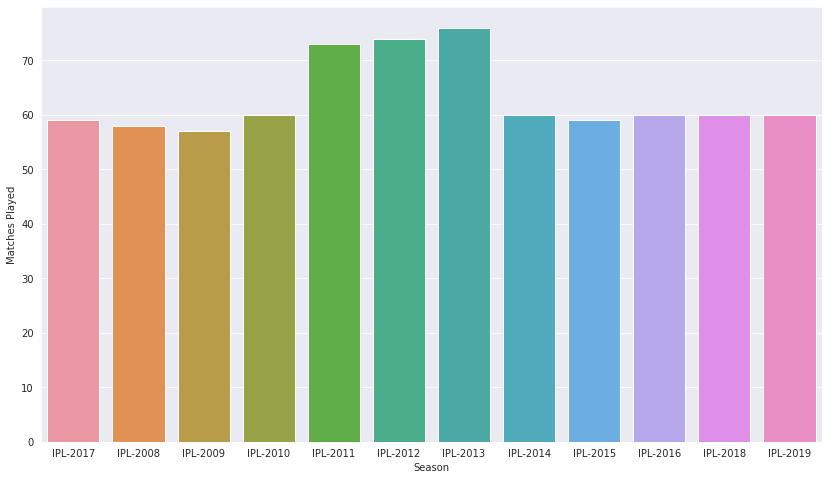

In [22]:
sns.countplot(x='Season', data=matches)
plt.rcParams['figure.figsize'] = (15, 8)
plt.ylabel('Matches Played')
plt.show()

**8.The most successful IPL Team**

The most successful IPL team is the team that has won most number of times. Which also means, answer it to this is as same as the above exercise except counting the number of instances in each season, here we’ve to count the number of instances in each winning team.

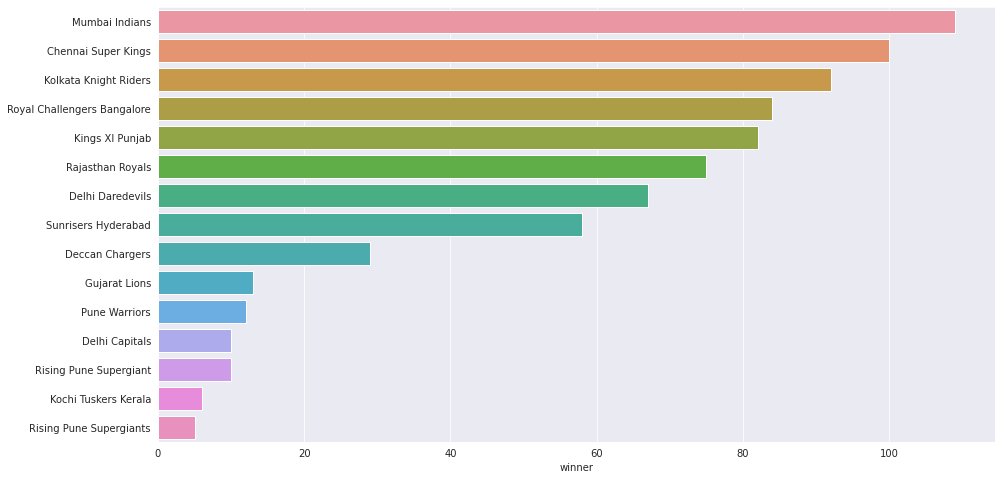

In [23]:
#sns.countplot(y='winner', data = matches)
#plt.show

data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

While this also could’ve been easily done with countplot(), just to introduce another variant of sns plot -barplot() has been used to visualize it.

**9.Top player of the match Winners**


In [ ]:
top_players = matches.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")

sns.barplot(x = top_players.index, y = top_players, orient='v'); 
plt.show()

**10.How many Toss winning teams have won the matches?**


Having solved those not-so-tough questions above, we are nowhere to extract a critical insight – which is – Has winning toss actually helped in winning the match?

Using our same approach of dividing our problem into chunks – we can separate this question into two – match winner and toss winner if both of them are same – then it’s a success and if not it’s a failure. Before visualizing the outcome, let us first see how the numbers look.

In [24]:
ss = matches['toss_winner'] == matches['winner']

ss.groupby(ss).size()

False    363
True     393
dtype: int64

Looks like, Toss winning actually helps in Match winning – or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.

**11.What's the percentage of it?**

In [25]:
round(ss.groupby(ss).size() / ss.count() * 100,2)

False    48.02
True     51.98
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


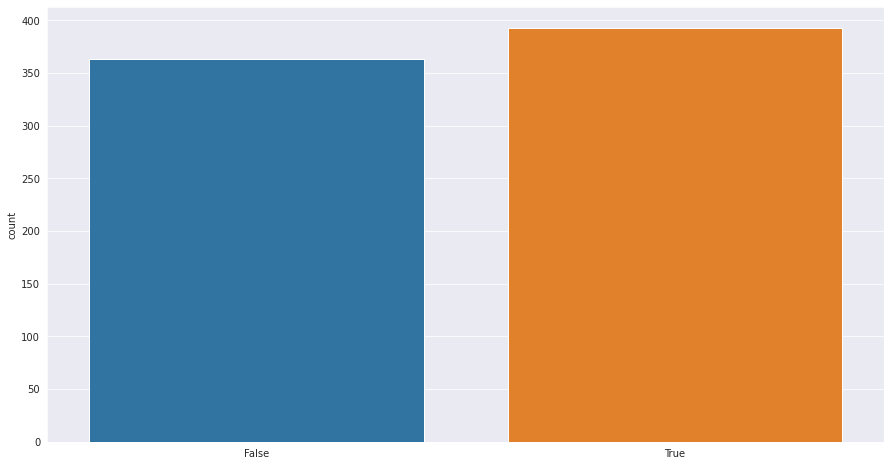

In [26]:
sns.countplot(ss);